In [1]:
# Importing all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# In case we want plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evvaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

In [2]:
time_df = pd.read_csv('day_and_crime.csv')
time_df.head()

,Date,Crime,Day_of_the_Week,Month,Year,Day_of_the_Month,Hour,Minute
0,"Mon 01-01-2018, 12:00:00 AM",1,1,1,2018,1,0,0
1,"Mon 01-01-2018, 12:30:00 AM",1,1,1,2018,1,0,30
2,"Mon 01-01-2018, 01:00:00 AM",1,1,1,2018,1,1,0
3,"Mon 01-01-2018, 01:30:00 AM",0,1,1,2018,1,1,30
4,"Mon 01-01-2018, 02:00:00 AM",1,1,1,2018,1,2,0


In [3]:
# Split data into X and Y
X = time_df.drop(['Date', 'Crime'], axis=1)
y = time_df['Crime']

In [4]:
# Split data in train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifer

In [6]:
# Put models n a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
   '''    
    # Set random seed
    np.random.seed(42)
    # Make a ditionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [7]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8954519286125504,
 'KNN': 0.9029360967184802,
 'Random Forest': 0.9038572251007484}

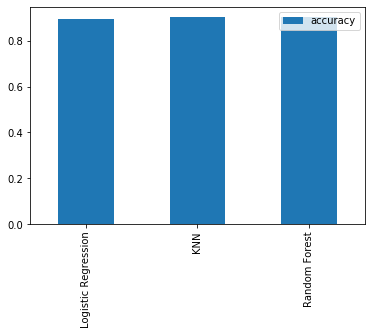

In [8]:
# Model Comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [9]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [11]:
train_scores[:-5]

[1.0,
 0.9499409885143498,
 0.9519272287630617,
 0.9358070180488788,
 0.9382250496560062,
 0.9257606724430755,
 0.930999740925185,
 0.9204640317798439,
 0.9235153573793143,
 0.9147355997581968,
 0.9181323584443997,
 0.9109070497135784,
 0.913469011773511,
 0.9082587293819626,
 0.9095828895477706]

In [12]:
test_scores[:-5]

[0.8986758779504893,
 0.8999424294761083,
 0.8986758779504893,
 0.9030512377662637,
 0.9029360967184802,
 0.9008635578583765,
 0.9012089810017271,
 0.9023603914795625,
 0.9033966609096142,
 0.9032815198618307,
 0.904202648244099,
 0.9031663788140472,
 0.9037420840529649,
 0.90097869890616,
 0.9007484168105929]